In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from skimage import io
from skimage import measure, color, segmentation, morphology, filters, util

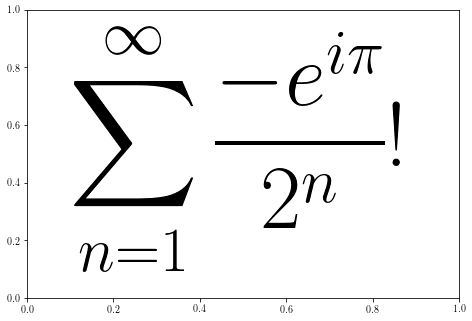

In [24]:
# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .2, .5
right = left + width
top = bottom + height
filename = 'eq.png'

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

#txt = 'middle'
txt = r"$\displaystyle\sum_{n=1}^\infty\frac{-e^{i\pi}}{2^n}$!"

ax.text(0.5*(left+right), 0.5*(bottom+top), txt,
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=90, color='black',
        transform=ax.transAxes)

#ax.set_axis_off()
plt.savefig(filename)
plt.show()

17
(0, 0, 288, 432)
(15, 78, 44, 134)
(21, 311, 26, 316)
(34, 301, 63, 317)
(35, 322, 63, 355)
(54, 262, 95, 295)
(70, 47, 195, 166)
(70, 196, 74, 250)
(91, 366, 139, 373)
(130, 188, 134, 358)
(148, 366, 155, 373)
(157, 237, 217, 270)
(163, 276, 192, 309)
(219, 138, 260, 157)
(232, 53, 261, 86)
(238, 91, 240, 130)
(249, 91, 251, 130)


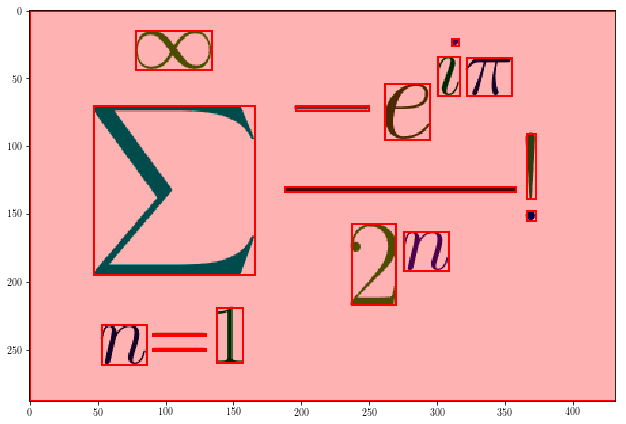

In [25]:
im = color.rgb2grey(io.imread(filename))
thresh = filters.threshold_otsu(im)
blobs = im > thresh
#cleared = segmentation.clear_border(blobs)
#blobs_labels = measure.label(blobs, background=0)
blobs_labels,num = measure.label(blobs, return_num=True, background=1)
print(num)

imoverlay = color.label2rgb(blobs_labels, image=im)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(imoverlay)

for region in measure.regionprops(blobs_labels):
    print(region.bbox)
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    
plt.tight_layout()
plt.show()


(0, 0, 288, 432)
(15, 78, 44, 134)
(21, 311, 26, 316)
(34, 301, 63, 317)
(35, 322, 63, 355)
(54, 262, 95, 295)
(70, 47, 195, 166)
(70, 196, 74, 250)
(91, 366, 139, 373)
(130, 188, 134, 358)
(148, 366, 155, 373)
(157, 237, 217, 270)
(163, 276, 192, 309)
(219, 138, 260, 157)
(232, 53, 261, 86)
(238, 91, 240, 130)
(249, 91, 251, 130)


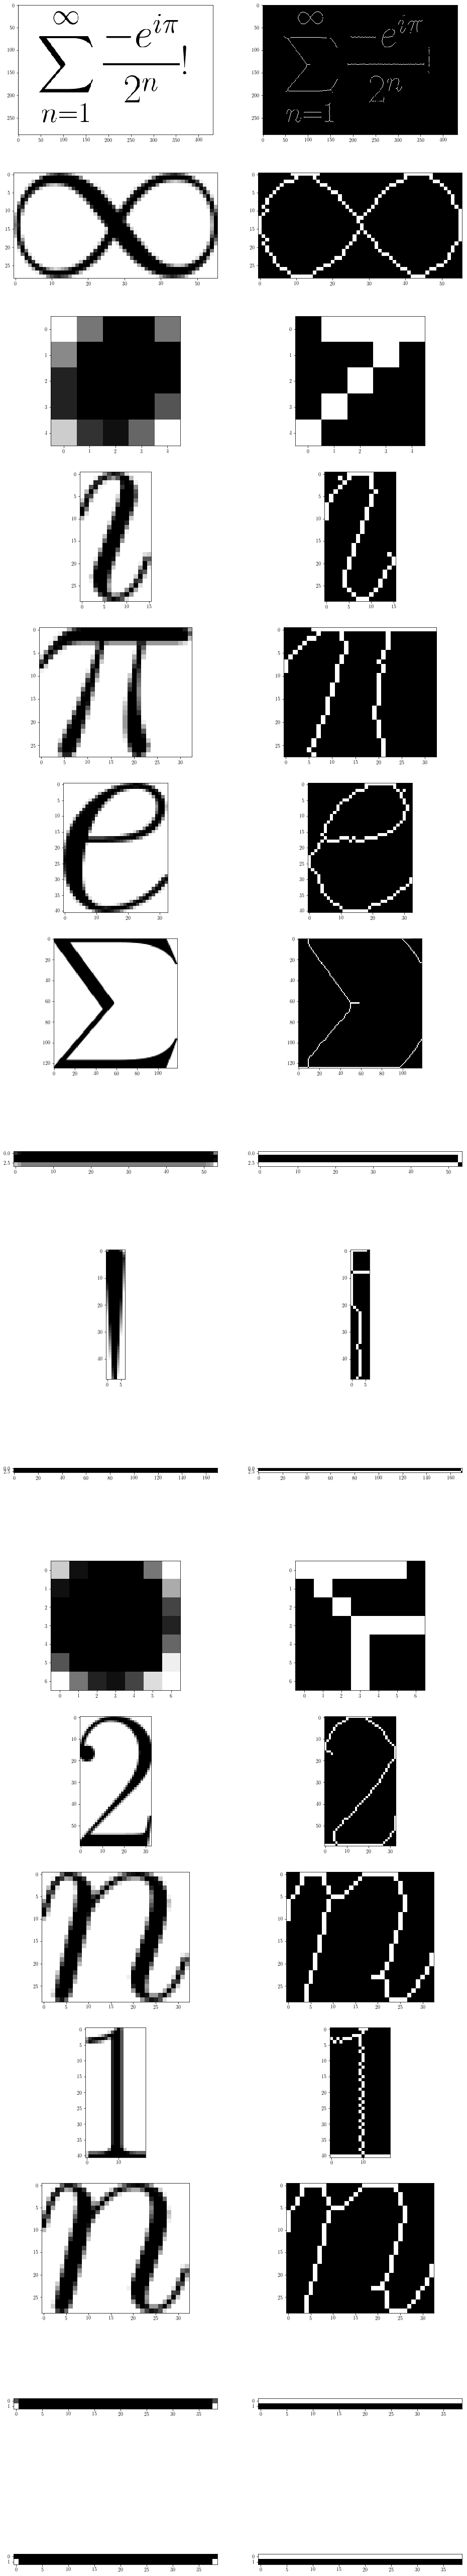

In [27]:
#blobs_labels

# display results
fig, axes = plt.subplots(nrows=num, ncols=2, figsize=(16, 96),
                         sharex=False, sharey=False)

ax = axes.ravel()

#ax[0].imshow(image, cmap=plt.cm.gray)
#ax[0].axis('off')
#ax[0].set_title('original', fontsize=20)

#ax[1].imshow(skeleton, cmap=plt.cm.gray)
#ax[1].axis('off')
#ax[1].set_title('skeleton', fontsize=20)

row=0
for region in measure.regionprops(blobs_labels):
    print(region.bbox)
    minr, minc, maxr, maxc = region.bbox
    subimg = im[minr:maxr,minc:maxc]
    #skeleton = morphology.skeletonize(util.invert(subimg))
    skeleton, distance =  morphology.medial_axis(util.invert(subimg), return_distance=True)
    ax[row].imshow(subimg, cmap=plt.cm.gray)
    ax[row+1].imshow(skeleton, cmap=plt.cm.gray)
    row += 2

#fig.tight_layout()
plt.show()